In [ ]:
pip install keras_facenet

In [ ]:
!pip install retina-face

In [ ]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os
import shutil
from retinaface import RetinaFace
from keras_facenet import FaceNet

In [ ]:
import cv2
frame_paths=[]

video_path = "/content/Param.mp4"  # Replace with the path to your video file
output_folder = "/content/Param_1"  # Replace with the desired output folder path
# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=10)]
# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()


In [ ]:
frame_paths

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
frame_paths

# code along with the best frame path

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

best_frame_path = None
best_frame = None
best_face = None
best_face_area = 0

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iterate over detected faces
    for (x, y, w, h) in faces:
        # Calculate the area of the face
        face_area = w * h

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame_path = frame_path
            best_frame = frame
            best_face = (x, y, w, h)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame is not None and best_face is not None:
    (x, y, w, h) = best_face
    cv2.rectangle(best_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)

print("Best frame path:", best_frame_path)


# Haar Cascade

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

best_frame = None
best_face = None
best_face_area = 0

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iterate over detected faces
    for (x, y, w, h) in faces:
        # Calculate the area of the face
        face_area = w * h

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame = frame
            best_face = (x, y, w, h)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame is not None and best_face is not None:
    (x, y, w, h) = best_face
    # cv2.rectangle(best_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from retinaface import RetinaFace
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Retina Face

In [ ]:
from retinaface import RetinaFace

In [ ]:
 # List of frame paths

best_frame = None
best_face = None
best_face_area = 0

detector = RetinaFace()

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to RGB (RetinaFace expects RGB images)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect faces in the frame using RetinaFace
    faces = detector.predict(frame)

    # Iterate over detected faces
    for face in faces:
        # Extract face bounding box coordinates
        x, y, w, h = face["box"]

        # Calculate the area of the face
        face_area = w * h

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame = frame
            best_face = (x, y, w, h)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame is not None and best_face is not None:
    (x, y, w, h) = best_face
    cv2.rectangle(best_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)


In [ ]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=e08fb57547f81809dd24c2e490d932dd0c03eaac34457b30f7b5c96897432af9
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


# Face Recognition Library

In [ ]:
import cv2
frame_paths=[]

video_path = "/content/ajay_specks.mp4"  # Replace with the path to your video file
output_folder = "/content/ajaybhai"  # Replace with the desired output folder path
# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=10)]
# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()


import cv2
import face_recognition
from google.colab.patches import cv2_imshow

best_frame = None
best_face = None
best_face_area = 0

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Find faces in the frame
    face_locations = face_recognition.face_locations(rgb_frame)

    # Iterate over detected faces
    for (top, right, bottom, left) in face_locations:
        # Calculate the face area
        face_area = (right - left) * (bottom - top)

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame = frame
            best_face = (left, top, right, bottom)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame is not None and best_face is not None:
    (left, top, right, bottom) = best_face
    # cv2.rectangle(best_frame, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)


# Face Recognition library along with the best path

In [ ]:
import cv2
frame_paths=[]

video_path = "/content/ajay_specks.mp4"  # Replace with the path to your video file
output_folder = "/content/ajaybhai"  # Replace with the desired output folder path
# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=10)]
# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()


import cv2
import face_recognition
from google.colab.patches import cv2_imshow

best_frame_path = None
best_face = None
best_face_area = 0

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Find faces in the frame
    face_locations = face_recognition.face_locations(rgb_frame)

    # Iterate over detected faces
    for (top, right, bottom, left) in face_locations:
        # Calculate the face area
        face_area = (right - left) * (bottom - top)

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame_path = frame_path
            best_face = (left, top, right, bottom)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame_path is not None and best_face is not None:
    best_frame = cv2.imread(best_frame_path)
    (left, top, right, bottom) = best_face
    cv2.rectangle(best_frame, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)

print("Best frame path:", best_frame_path)


# Pipeline

In [ ]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow


In [ ]:

frame_paths=[]

video_path = "/content/Sasmita.mp4"  # Replace with the path to your video file
output_folder = "/content/Sasmita"  # Replace with the desired output folder path
# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=10)]
# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    # the below code is not to be printed, so commented
    # print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()

best_frame_path = None
best_face = None
best_face_area = 0

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Find faces in the frame
    face_locations = face_recognition.face_locations(rgb_frame)

    # Iterate over detected faces
    for (top, right, bottom, left) in face_locations:
        # Calculate the face area
        face_area = (right - left) * (bottom - top)

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame_path = frame_path
            best_face = (left, top, right, bottom)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame_path is not None and best_face is not None:
    best_frame = cv2.imread(best_frame_path)
    (left, top, right, bottom) = best_face
    # cv2.rectangle(best_frame, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)


# the below code is not to be printed, so commented
print("Best frame path:", best_frame_path)

img = cv2.imread('/content/Sasmitaframe_6.jpg')
img1 = RetinaFace.detect_faces(img)
faces = img1['face_1']['facial_area']
x1, y1, x2, y2 = faces
cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
# cv2.imwrite('/content/frame_crop_yash_glasses.jpg', cropped_image)

top_similarities = []
top_classes = []

def generate_embedding(image):
    image = cv2.resize(image, (160, 160))
    img = np.expand_dims(image, axis=0)
    embeddings = model.embeddings(img)
    return embeddings

# image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
sample = generate_embedding(cropped_image)
sp = sample.reshape(1, -1)

# Get 1 embedding and compare it with all other embeddings
folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
for file_name in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file_name)
    for f_name in os.listdir(file_name):
        if f_name.endswith('.npy'):
            file_path = os.path.join(file_name, f_name)
            loaded_array = np.load(file_path)

            for i in range(32):
                embedding_3 = loaded_array[i]
                embedding_3 = embedding_3.reshape(1, -1)
                similarity = cosine_similarity(sp, embedding_3)

                top_similarities.append(similarity)
                top_classes.append(f_name[:-4])

# Select top 15 similarity scores and corresponding class names
# sorted_indices = np.argsort(top_similarities)[::-1]
# top_similarities = np.array(top_similarities)[sorted_indices][:15]
# top_classes = np.array(top_classes)[sorted_indices][:15]

# # Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)

top_similarities=np.array(top_similarities)
top_similarities
top_10_indices = np.argsort(top_similarities, axis=None)[-30:]
top_10_max_numbers = top_similarities[top_10_indices]

top_classes=np.array(top_classes)
top_10_classes=top_classes[top_10_indices]
unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

# Find the index of the class with the maximum count
max_count_idx = np.argmax(class_counts)

# Get the class with the maximum count
result = unique_classes[max_count_idx]
print(top_10_max_numbers)
print(top_10_classes)
print("Result:", result)





# better Version

In [ ]:
model = FaceNet()

In [ ]:
start=time.time()
frame_paths=[]

video_path = "/content/Rikesh_100.mp4"  # Replace with the path to your video file
output_folder = "/content/rikesh__"  # Replace with the desired output folder path
# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=10)]
# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    # the below code is not to be printed, so commented
    # print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()

import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

best_frame_path = None
best_frame = None
best_face = None
best_face_area = 0

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iterate over detected faces
    for (x, y, w, h) in faces:
        # Calculate the area of the face
        face_area = w * h

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame_path = frame_path
            best_frame = frame
            best_face = (x, y, w, h)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame is not None and best_face is not None:
    (x, y, w, h) = best_face
    # cv2.rectangle(best_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)

print("Best frame path:", best_frame_path)

img = cv2.imread(best_frame_path)
img1 = RetinaFace.detect_faces(img)
faces = img1['face_1']['facial_area']
x1, y1, x2, y2 = faces
cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
# cv2.imwrite('/content/frame_crop_yash_glasses.jpg', cropped_image)

top_similarities = []
top_classes = []

def generate_embedding(image):
    image = cv2.resize(image, (160, 160))
    img = np.expand_dims(image, axis=0)
    embeddings = model.embeddings(img)
    return embeddings

# image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
sample = generate_embedding(cropped_image)
sp = sample.reshape(1, -1)

# Get 1 embedding and compare it with all other embeddings
folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
for file_name in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file_name)
    for f_name in os.listdir(file_name):
        if f_name.endswith('.npy'):
            file_path = os.path.join(file_name, f_name)
            loaded_array = np.load(file_path)

            for i in range(32):
                embedding_3 = loaded_array[i]
                embedding_3 = embedding_3.reshape(1, -1)
                similarity = cosine_similarity(sp, embedding_3)

                top_similarities.append(similarity)
                top_classes.append(f_name[:-4])

# Select top 15 similarity scores and corresponding class names
# sorted_indices = np.argsort(top_similarities)[::-1]
# top_similarities = np.array(top_similarities)[sorted_indices][:15]
# top_classes = np.array(top_classes)[sorted_indices][:15]

# # Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)

top_similarities=np.array(top_similarities)
top_similarities
top_10_indices = np.argsort(top_similarities, axis=None)[-30:]
top_10_max_numbers = top_similarities[top_10_indices]

top_classes=np.array(top_classes)
top_10_classes=top_classes[top_10_indices]
unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

# Find the index of the class with the maximum count
max_count_idx = np.argmax(class_counts)

# Get the class with the maximum count
result = unique_classes[max_count_idx]
print(top_10_max_numbers)
print(top_10_classes)
print("Result:", result)

end=time.time()
print(end-start)

# pipeline with face recognition library

In [ ]:
start=time.time()
import cv2
frame_paths=[]

video_path = "/content/r469.mp4"  # Replace with the path to your video file
output_folder = "/content/469"  # Replace with the desired output folder path
# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=10)]
# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()

best_frame_path = None
best_face = None
best_face_area = 0

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Find faces in the frame
    face_locations = face_recognition.face_locations(rgb_frame)

    # Iterate over detected faces
    for (top, right, bottom, left) in face_locations:
        # Calculate the face area
        face_area = (right - left) * (bottom - top)

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame_path = frame_path
            best_face = (left, top, right, bottom)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame_path is not None and best_face is not None:
    best_frame = cv2.imread(best_frame_path)
    (left, top, right, bottom) = best_face
    cv2.rectangle(best_frame, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)

print("Best frame path:", best_frame_path)

img = cv2.imread(best_frame_path)
img1 = RetinaFace.detect_faces(img)
faces = img1['face_1']['facial_area']
x1, y1, x2, y2 = faces
cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
# cv2.imwrite('/content/frame_crop_yash_glasses.jpg', cropped_image)

top_similarities = []
top_classes = []

def generate_embedding(image):
    image = cv2.resize(image, (160, 160))
    img = np.expand_dims(image, axis=0)
    embeddings = model.embeddings(img)
    return embeddings

# image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
sample = generate_embedding(cropped_image)
sp = sample.reshape(1, -1)

# Get 1 embedding and compare it with all other embeddings
folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
for file_name in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file_name)
    for f_name in os.listdir(file_name):
        if f_name.endswith('.npy'):
            file_path = os.path.join(file_name, f_name)
            loaded_array = np.load(file_path)

            for i in range(32):
                embedding_3 = loaded_array[i]
                embedding_3 = embedding_3.reshape(1, -1)
                similarity = cosine_similarity(sp, embedding_3)

                top_similarities.append(similarity)
                top_classes.append(f_name[:-4])

# Select top 15 similarity scores and corresponding class names
# sorted_indices = np.argsort(top_similarities)[::-1]
# top_similarities = np.array(top_similarities)[sorted_indices][:15]
# top_classes = np.array(top_classes)[sorted_indices][:15]

# # Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)

top_similarities=np.array(top_similarities)
top_similarities
top_10_indices = np.argsort(top_similarities, axis=None)[-30:]
top_10_max_numbers = top_similarities[top_10_indices]

top_classes=np.array(top_classes)
top_10_classes=top_classes[top_10_indices]
unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

# Find the index of the class with the maximum count
max_count_idx = np.argmax(class_counts)

# Get the class with the maximum count
result = unique_classes[max_count_idx]
print(top_10_max_numbers)
print(top_10_classes)
print("Result:", result)

end=time.time()
print(end-start)

In [ ]:
top_similarities

array([[[ 0.51355   ]],

       [[ 0.51355   ]],

       [[ 0.32205456]],

       ...,

       [[-0.06268651]],

       [[-0.06268651]],

       [[-0.05907653]]], dtype=float32)

In [ ]:
top_10_max_numbers>.70

array([[[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]],

       [[False]]])

In [ ]:

frame_paths=[]

video_path = "/content/r594.mp4"  
output_folder = "/content/r594"  
# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=5)]
# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    # the below code is not to be printed, so commented
    # print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()

import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

best_frame_path = None
best_frame = None
best_face = None
best_face_area = 0

for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iterate over detected faces
    for (x, y, w, h) in faces:
        # Calculate the area of the face
        face_area = w * h

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame_path = frame_path
            best_frame = frame
            best_face = (x, y, w, h)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame is not None and best_face is not None:
    (x, y, w, h) = best_face
    # cv2.rectangle(best_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)

print("Best frame path:", best_frame_path)

img = cv2.imread(best_frame_path)
img1 = RetinaFace.detect_faces(img)
faces = img1['face_1']['facial_area']
x1, y1, x2, y2 = faces
cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
# cv2.imwrite('/content/frame_crop_yash_glasses.jpg', cropped_image)

top_similarities = []
top_classes = []

def generate_embedding(image):
    image = cv2.resize(image, (160, 160))
    img = np.expand_dims(image, axis=0)
    embeddings = model.embeddings(img)
    return embeddings

# image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
sample = generate_embedding(cropped_image)
sp = sample.reshape(1, -1)

# Get 1 embedding and compare it with all other embeddings
folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
for file_name in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file_name)
    for f_name in os.listdir(file_name):
        if f_name.endswith('.npy'):
            file_path = os.path.join(file_name, f_name)
            loaded_array = np.load(file_path)

            for i in range(32):
                embedding_3 = loaded_array[i]
                embedding_3 = embedding_3.reshape(1, -1)
                similarity = cosine_similarity(sp, embedding_3)

                top_similarities.append(similarity)
                top_classes.append(f_name[:-4])

# Select top 15 similarity scores and corresponding class names
# sorted_indices = np.argsort(top_similarities)[::-1]
# top_similarities = np.array(top_similarities)[sorted_indices][:15]
# top_classes = np.array(top_classes)[sorted_indices][:15]

# # Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)

top_similarities=np.array(top_similarities)
top_similarities
top_10_indices = np.argsort(top_similarities, axis=None)[-30:]
top_10_max_numbers = top_similarities[top_10_indices]

top_classes=np.array(top_classes)
top_10_classes=top_classes[top_10_indices]
unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

# Find the index of the class with the maximum count
max_count_idx = np.argmax(class_counts)

# Get the class with the maximum count
result = unique_classes[max_count_idx]
print(top_10_max_numbers)
print(top_10_classes)
print("Result:", result)

In [ ]:
x,y,w,h

(166, 174, 114, 114)

In [ ]:
x1,y1,x2,y2

(238, 17, 263, 53)

In [ ]:
frame_paths=[]

video_path = "/content/r594.mp4"  # Replace with the path to your video file
output_folder = "/content/r594"  # Replace with the desired output folder path
# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=10)]
# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    # the below code is not to be printed, so commented
    # print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()


In [ ]:
import time

In [ ]:

start=time.time()

result_list=[]
count=0

for i in range(len(frame_paths)-6):
  # print(frame_paths[i])
  img = cv2.imread(frame_paths[i])
  img1 = RetinaFace.detect_faces(img)
  faces = img1['face_1']['facial_area']
  x1, y1, x2, y2 = faces
  cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
  # cv2.imwrite('/content/frame_crop_yash_glasses.jpg', cropped_image)

  top_similarities = []
  top_classes = []

  def generate_embedding(image):
      image = cv2.resize(image, (160, 160))
      img = np.expand_dims(image, axis=0)
      embeddings = model.embeddings(img)
      return embeddings

  # image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
  sample = generate_embedding(cropped_image)
  sp = sample.reshape(1, -1)

  # Get 1 embedding and compare it with all other embeddings
  folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
  for file_name in os.listdir(folder_path):
      file_name = os.path.join(folder_path, file_name)
      for f_name in os.listdir(file_name):
          if f_name.endswith('.npy'):
              file_path = os.path.join(file_name, f_name)
              loaded_array = np.load(file_path)

              for i in range(32):
                  embedding_3 = loaded_array[i]
                  embedding_3 = embedding_3.reshape(1, -1)
                  similarity = cosine_similarity(sp, embedding_3)

                  top_similarities.append(similarity)
                  top_classes.append(f_name[:-4])

  # Select top 15 similarity scores and corresponding class names
  # sorted_indices = np.argsort(top_similarities)[::-1]
  # top_similarities = np.array(top_similarities)[sorted_indices][:15]
  # top_classes = np.array(top_classes)[sorted_indices][:15]

  # # Determine the highest occurring class from the top 15 classes
  # unique_classes, class_counts = np.unique(top_classes, return_counts=True)
  # highest_occurrence_idx = np.argmax(class_counts)
  # result = unique_classes[highest_occurrence_idx]

  # print("Result:", result)

  top_similarities=np.array(top_similarities)
  top_similarities
  top_10_indices = np.argsort(top_similarities, axis=None)[-30:]
  top_10_max_numbers = top_similarities[top_10_indices]

  top_classes=np.array(top_classes)
  top_10_classes=top_classes[top_10_indices]
  unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

  # Find the index of the class with the maximum count
  max_count_idx = np.argmax(class_counts)

  # Get the class with the maximum count
  result = unique_classes[max_count_idx]

  result_list.append(result)
  # if i>=2:
    # if result_list[i]==result_list[i-1]:
    #   count=count+1
    #   if count==3:
  #   #     break
  # if i >= 3:
  #   if result_list[i] == result_list[i - 1] == result_list[i - 2] == result_list[i - 3]:
  #       break


# print(top_10_max_numbers)
# print(top_10_classes)
# print("Result:", result)

# print(result)

print(result_list)
end=time.time()
print(end-start)

1/1 [==============================] - 0s 27ms/step
['train_o068', 'train_r594', 'train_o016', 'train_r288']
12.229585647583008


In [ ]:
folder_path_2='/content/drive/MyDrive/Face_Recognition/best_frames_sample'
for folder_name in os.listdir(folder_path_2):
  folder_name=os.path.join(folder_path_2,folder_name)
  print(folder_name)
  for img_path in os.listdir(folder_name):
    img_path=os.path.join(folder_name,img_path)



In [ ]:
count=0
count_match=0
folder_path_2='/content/drive/MyDrive/Face_Recognition/best_frames_sample'
for folder_name in os.listdir(folder_path_2):
  folder_name=os.path.join(folder_path_2,folder_name)
  print(folder_name)
  for file_path_2 in os.listdir(folder_name):
    file_path_2=os.path.join(folder_name,file_path_2)

    img = cv2.imread(file_path_2)
    img1 = RetinaFace.detect_faces(img)
    faces = img1['face_1']['facial_area']
    x1, y1, x2, y2 = faces
    cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
    # cv2.imwrite('/content/469.jpg', cropped_image)
    cv2_imshow(cropped_image)

    top_similarities = []
    top_classes = []

    def generate_embedding(image):
        image = cv2.resize(image, (160, 160))
        img = np.expand_dims(image, axis=0)
        embeddings = model.embeddings(img)
        return embeddings

    # image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
    sample = generate_embedding(cropped_image)
    sp = sample.reshape(1, -1)

    # Get 1 embedding and compare it with all other embeddings
    folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
    for file_name in os.listdir(folder_path):
        file_name = os.path.join(folder_path, file_name)
        for f_name in os.listdir(file_name):
            if f_name.endswith('.npy'):
                file_path = os.path.join(file_name, f_name)
                loaded_array = np.load(file_path)

                for i in range(32):
                    embedding_3 = loaded_array[i]
                    embedding_3 = embedding_3.reshape(1, -1)
                    similarity = cosine_similarity(sp, embedding_3)

                    top_similarities.append(similarity)
                    top_classes.append(f_name[:-4])

    # Select top 15 similarity scores and corresponding class names
    # sorted_indices = np.argsort(top_similarities)[::-1]
    # top_similarities = np.array(top_similarities)[sorted_indices][:15]
    # top_classes = np.array(top_classes)[sorted_indices][:15]

    # # Determine the highest occurring class from the top 15 classes
    # unique_classes, class_counts = np.unique(top_classes, return_counts=True)
    # highest_occurrence_idx = np.argmax(class_counts)
    # result = unique_classes[highest_occurrence_idx]

    # print("Result:", result)

    top_similarities=np.array(top_similarities)
    top_similarities
    top_10_indices = np.argsort(top_similarities, axis=None)[-30:]
    top_10_max_numbers = top_similarities[top_10_indices]

    top_classes=np.array(top_classes)
    top_10_classes=top_classes[top_10_indices]
    unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

    # Find the index of the class with the maximum count
    max_count_idx = np.argmax(class_counts)

    # Get the class with the maximum count
    result = unique_classes[max_count_idx]
    print(top_10_max_numbers)
    print(top_10_classes)
    print("Result:", result)


    if folder_name[-3:]== result[-3:]:
      count=count+1
      count_match=count_match+1

    else:
      count=count+1

accuracy=count_match/count

print(accuracy)


In [ ]:
result[-3:]

'654'

In [ ]:
img = cv2.imread('/content/Screenshot from 2023-06-14 09-11-48.png')
img1 = RetinaFace.detect_faces(img)
faces = img1['face_1']['facial_area']
x1, y1, x2, y2 = faces
cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
cv2.imwrite('/content/sample_image.jpg', cropped_image)
cv2_imshow(cropped_image)

top_similarities = []
top_classes = []

def generate_embedding(image):
    image = cv2.resize(image, (160, 160))
    img = np.expand_dims(image, axis=0)
    embeddings = model.embeddings(img)
    return embeddings

# image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
sample = generate_embedding(cropped_image)
sp = sample.reshape(1, -1)

# Get 1 embedding and compare it with all other embeddings
folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
for file_name in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file_name)
    for f_name in os.listdir(file_name):
        if f_name.endswith('.npy'):
            file_path = os.path.join(file_name, f_name)
            loaded_array = np.load(file_path)

            for i in range(32):
                embedding_3 = loaded_array[i]
                embedding_3 = embedding_3.reshape(1, -1)
                similarity = cosine_similarity(sp, embedding_3)

                top_similarities.append(similarity)
                top_classes.append(f_name[:-4])

# Select top 15 similarity scores and corresponding class names
# sorted_indices = np.argsort(top_similarities)[::-1]
# top_similarities = np.array(top_similarities)[sorted_indices][:15]
# top_classes = np.array(top_classes)[sorted_indices][:15]

# # Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)

top_similarities=np.array(top_similarities)
top_similarities
top_10_indices = np.argsort(top_similarities, axis=None)[-30:]
top_10_max_numbers = top_similarities[top_10_indices]

top_classes=np.array(top_classes)
top_10_classes=top_classes[top_10_indices]
unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

# Find the index of the class with the maximum count
max_count_idx = np.argmax(class_counts)

# Get the class with the maximum count
result = unique_classes[max_count_idx]
print(top_10_max_numbers)
print(top_10_classes)
print("Result:", result)



# with threshold

In [ ]:
model=FaceNet()

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 205MB/s]


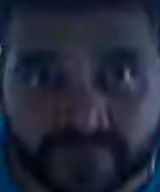

1/1 [==============================] - 3s 3s/step
The person is unknown


In [ ]:
threshold=0.62
img = cv2.imread('/content/Screenshot from 2023-06-14 09-11-48.png')
img1 = RetinaFace.detect_faces(img)
faces = img1['face_1']['facial_area']
x1, y1, x2, y2 = faces
cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
cv2.imwrite('/content/sample_image.jpg', cropped_image)
cv2_imshow(cropped_image)

top_similarities = []
top_classes = []

def generate_embedding(image):
    image = cv2.resize(image, (160, 160))
    img = np.expand_dims(image, axis=0)
    embeddings = model.embeddings(img)
    return embeddings

# image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
sample = generate_embedding(cropped_image)
sp = sample.reshape(1, -1)

# Get 1 embedding and compare it with all other embeddings
folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
for file_name in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file_name)
    for f_name in os.listdir(file_name):
        if f_name.endswith('.npy'):
            file_path = os.path.join(file_name, f_name)
            loaded_array = np.load(file_path)

            for i in range(32):
                embedding_3 = loaded_array[i]
                embedding_3 = embedding_3.reshape(1, -1)
                similarity = cosine_similarity(sp, embedding_3)

                if similarity>threshold:
                  top_similarities.append(similarity)
                  top_classes.append(f_name[:-4])

# Select top 15 similarity scores and corresponding class names
# sorted_indices = np.argsort(top_similarities)[::-1]
# top_similarities = np.array(top_similarities)[sorted_indices][:15]
# top_classes = np.array(top_classes)[sorted_indices][:15]

# # Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)

top_similarities=np.array(top_similarities)
top_similarities
top_indices = np.argsort(top_similarities, axis=None)[-len(top_similarities):]
top_max_numbers = top_similarities[top_indices]

top_classes=np.array(top_classes)
top_classes=top_classes[top_indices]
unique_classes, class_counts = np.unique(top_classes, return_counts=True)

if len(unique_classes)==0:
  print("The person is unknown")

else:

  # Find the index of the class with the maximum count
  max_count_idx = np.argmax(class_counts)

  # Get the class with the maximum count
  result = unique_classes[max_count_idx]
  print(top_max_numbers)
  print(top_classes)
  print("Result:", result)



In [ ]:
len(unique_classes)

0

In [ ]:
top_similarities

array([[[0.65704453]],

       [[0.65704453]],

       [[0.65704453]],

       [[0.65704453]],

       [[0.65704453]],

       [[0.65704453]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.75369275]],

       [[0.75369275]],

       [[0.75369275]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.72442806]],

       [[0.8510381 ]],

       [[0.8440033 ]],

       [[0.7954101 ]],

       [[0.7954101 ]],

       [[0.7954101 ]],

       [[0.8510381 ]],

       [[0.7954101 ]],

       [[0.7954101 ]],

       [[0.8510381 ]],

       [[0.8440033 ]],

       [[0.8440033 ]],

       [[0.7954101 ]],

       [[0.8405153 ]],

       [[0.7954101 ]],

       [[0.8440033 ]],

       [[0.81669205]],

       [[0.7954101 ]],

       [[0.8510381 ]],

       [[0.8510381 ]],

       [[0.79541

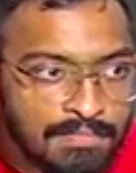

In [ ]:
cv2_imshow(cropped_image)

In [ ]:
top_similarities = []
top_classes = []

def generate_embedding(image):
    image = cv2.resize(image, (160, 160))
    img = np.expand_dims(image, axis=0)
    embeddings = model.embeddings(img)
    return embeddings

image = cv2.imread('/content/output_images_yash_glassesframe_4.jpg')
sample = generate_embedding(image)
sp = sample.reshape(1, -1)

# Get 1 embedding and compare it with all other embeddings
folder_path = "/content/drive/MyDrive/Face_Recognition/latest_embeddings/embeddings/train/"
for file_name in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file_name)
    for f_name in os.listdir(file_name):
        if f_name.endswith('.npy'):
            file_path = os.path.join(file_name, f_name)
            loaded_array = np.load(file_path)

            for i in range(32):
                embedding_3 = loaded_array[i]
                embedding_3 = embedding_3.reshape(1, -1)
                similarity = cosine_similarity(sp, embedding_3)

                top_similarities.append(similarity)
                top_classes.append(f_name[:-4])

# Select top 15 similarity scores and corresponding class names
# sorted_indices = np.argsort(top_similarities)[::-1]
# top_similarities = np.array(top_similarities)[sorted_indices][:15]
# top_classes = np.array(top_classes)[sorted_indices][:15]

# # Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)

top_similarities=np.array(top_similarities)
top_similarities
top_10_indices = np.argsort(top_similarities, axis=None)[-10:]
top_10_max_numbers = top_similarities[top_10_indices]

top_classes=np.array(top_classes)
top_10_classes=top_classes[top_10_indices]
unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

# Find the index of the class with the maximum count
max_count_idx = np.argmax(class_counts)

# Get the class with the maximum count
result = unique_classes[max_count_idx]
print(top_10_max_numbers)
print(top_10_classes)
print("Result:", result)



In [ ]:
sorted_indices = np.argsort(np.array(top_similarities))[::-1]
sorted_indices

array([[[0]],

       [[0]],

       [[0]],

       ...,

       [[0]],

       [[0]],

       [[0]]])

In [ ]:
top_similarities=np.array(top_similarities)
top_similarities
top_10_indices = np.argsort(top_similarities, axis=None)[-10:]
top_10_max_numbers = top_similarities[top_10_indices]

top_classes=np.array(top_classes)
top_10_classes=top_classes[top_10_indices]
unique_classes, class_counts = np.unique(top_10_classes, return_counts=True)

# Find the index of the class with the maximum count
max_count_idx = np.argmax(class_counts)

# Get the class with the maximum count
result = unique_classes[max_count_idx]

print("Result:", result)


Result: train_r681


In [ ]:
import pandas as pd

In [ ]:
for file_name in os.listdir(folder_path):
    file_name = os.path.join(folder_path, file_name)
    for f_name in os.listdir(file_name):
        if f_name.endswith('.npy'):
            file_path = os.path.join(file_name, f_name) Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)

            loaded_array = np.load(file_path)
            print(file_name)

        for i in range(32):
            embedding_3=loaded_array[i]
            embedding_3=embedding_3.reshape(1,-1)
            similarity=cosine_similarity(sp,embedding_3)
            print(similarity)

In [ ]:
pd.options.display.max_rows=20000

In [ ]:
top_similarities

In [ ]:
 Determine the highest occurring class from the top 15 classes
# unique_classes, class_counts = np.unique(top_classes, return_counts=True)
# highest_occurrence_idx = np.argmax(class_counts)
# result = unique_classes[highest_occurrence_idx]

# print("Result:", result)
top_classes

In [ ]:
model=FaceNet()

In [ ]:
def generate_embedding(image):
    image = cv2.resize(image, (160, 160))
    img = np.expand_dims(image, axis=0)
    embeddings = model.embeddings(img)
    return embeddings

image = cv2.imread('/content/2023-05-31-170118.jpg')
sample = generate_embedding(image)
sp = sample.reshape(1, -1)
sp

In [ ]:
import cv2
import numpy as np

def generate_embedding(image):
    image = cv2.resize(image, (160, 160))

    # Apply feature masking
    mask = create_feature_mask(image)  # Replace with your own implementation

    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Expand dimensions for model input
    img = np.expand_dims(masked_image, axis=0)

    # Generate embeddings
    embeddings = model.embeddings(img)
    return embeddings



image = cv2.imread('/content/2023-05-31-170118.jpg')
sample_1 = generate_embedding(image)
sp1 = sample_1.reshape(1, -1)
sp1

In [ ]:
import cv2
import dlib

def create_feature_mask(image):
    # Load facial landmark detector (using dlib's pre-trained model)
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('/content/drive/MyDrive/Face_Recognition/shape_predictor_68_face_landmarks.dat')  # Path to the landmark detection model

    # Detect faces in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    # Use the first detected face (you can modify this for multiple faces)
    if len(faces) > 0:
        face = faces[0]

        # Detect facial landmarks
        landmarks = predictor(gray, face)

        # Create an empty mask
        mask = np.zeros_like(gray)

        # Define the regions to exclude (e.g., beard or spectacles)
        # For demonstration purposes, let's say region 1 is the beard and region 2 is the spectacles
        # Modify the coordinates based on your requirements and the landmark points detected
        region1_points = landmarks.parts()[17:27]  # Example: Landmark points for the beard region
        region2_points = landmarks.parts()[36:48]  # Example: Landmark points for the spectacles region

        # Draw filled polygons on the mask for the specified regions
        cv2.fillPoly(mask, [np.array(region1_points)], 255)
        cv2.fillPoly(mask, [np.array(region2_points)], 255)

        # Invert the mask
        mask = cv2.bitwise_not(mask)

        return mask

    return None


In [ ]:
similarity=cosine_similarity(sp,sp)

In [ ]:
similarity

array([[0.9999998]], dtype=float32)

In [ ]:
import cv2

# Load the pre-trained face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def assess_face_quality(face):
    # Implement your own face quality assessment algorithm here
    # You can consider factors like face size, sharpness, lighting, etc.
    # Return a quality score, where higher values indicate better quality
    return 0

def find_best_frame(video_path):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    best_frame = None
    best_face = None
    best_quality = -1

    # Iterate over the video frames
    while True:
        # Read a frame from the video
        ret, frame = video_capture.read()

        # Check if the frame was successfully read
        if not ret:
            break

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Iterate over detected faces
        for (x, y, w, h) in faces:
            # Crop the face region
            face = frame[y:y + h, x:x + w]

            # Assess the quality of the face
            quality = assess_face_quality(face)

            # Update the best frame if the current face has higher quality
            if quality > best_quality:
                best_frame = frame.copy()
                best_face = face
                best_quality = quality

    # Release the video capture object
    video_capture.release()

    return best_frame, best_face

# Usage example
video_path = "/content/Param.mp4"
best_frame, best_face = find_best_frame(video_path)

# Display the best frame with the detected face
cv2_imshow(best_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


# optimized code

In [ ]:
import cv2

In [ ]:
import concurrent.futures

video_path = "/content/Param.mp4"
output_folder = "/content/param_2"

def extract_frame(frame_index):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    # Read the frame
    ret, frame = video_capture.read()
    # Release the video capture object
    video_capture.release()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        return None

    # Save the frame as an image
    output_path = f"{output_folder}/frame_{frame_index}.jpg"
    cv2.imwrite(output_path, frame)
    print(f"Saved frame {frame_index} as {output_path}")
    return output_path

# Open the video file
video_capture = cv2.VideoCapture(video_path)
# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=10)]
# Release the video capture object
video_capture.release()

# Extract frames using parallel processing
frame_paths = []
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit tasks for frame extraction
    futures = [executor.submit(extract_frame, frame_index) for frame_index in frame_indices]
    # Get the results as they complete
    for future in concurrent.futures.as_completed(futures):
        result = future.result()
        if result is not None:
            frame_paths.append(result)



In [ ]:
import time
import cv2
import face_recognition

Saved frame 0 as /content/param_2frame_1.jpg
Saved frame 36 as /content/param_2frame_2.jpg
Saved frame 73 as /content/param_2frame_3.jpg
Saved frame 109 as /content/param_2frame_4.jpg
Saved frame 146 as /content/param_2frame_5.jpg
Saved frame 183 as /content/param_2frame_6.jpg


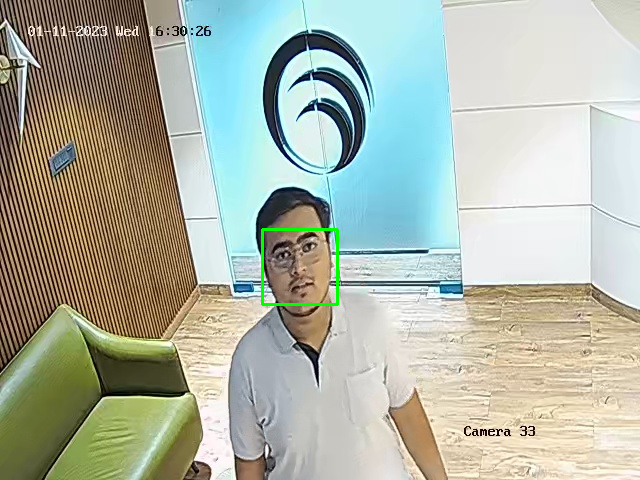

Best frame path: /content/param_2frame_4.jpg
Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 177MB/s]


17.835073232650757


In [ ]:
start=time.time()
frame_paths = []

video_path = "/content/Param.mp4"  # Replace with the path to your video file
output_folder = "/content/param_2"  # Replace with the desired output folder path

# Open the video file
video_capture = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

# Calculate frame indices to extract
frame_indices = [int(frame_index) for frame_index in np.linspace(0, total_frames - 1, num=6)]

# Iterate over the frame indices and extract frames
for idx, frame_index in enumerate(frame_indices):
    # Set the frame index to extract
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

    # Read the frame
    ret, frame = video_capture.read()

    # Check if the frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_index}")
        continue

    # Save the frame as an image
    output_path = f"{output_folder}frame_{idx + 1}.jpg"
    cv2.imwrite(output_path, frame)
    frame_paths.append(output_path)
    print(f"Saved frame {frame_index} as {output_path}")

# Release the video capture object
video_capture.release()

best_frame_path = None
best_face = None
best_face_area = 0

# Iterate over frame paths and perform face detection on frames with larger faces
for frame_path in frame_paths:
    # Read the frame
    frame = cv2.imread(frame_path)

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Find faces in the frame
    face_locations = face_recognition.face_locations(rgb_frame)

    # Skip frames with no faces or small faces
    if len(face_locations) == 0:
        continue

    # Iterate over detected faces
    for (top, right, bottom, left) in face_locations:
        # Calculate the face area
        face_area = (right - left) * (bottom - top)

        # Update the best face if the current face has a larger area
        if face_area > best_face_area:
            best_frame_path = frame_path
            best_face = (left, top, right, bottom)
            best_face_area = face_area

# Draw a rectangle around the best face on the best frame
if best_frame_path is not None and best_face is not None:
    best_frame = cv2.imread(best_frame_path)
    (left, top, right, bottom) = best_face
    cv2.rectangle(best_frame, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the best frame with the detected face
cv2_imshow(best_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Best frame path:", best_frame_path)

img = cv2.imread(best_frame_path)
img1 = RetinaFace.detect_faces(img)
faces = img1['face_1']['facial_area']
x1, y1, x2, y2 = faces
cropped_image = img[int(y1):int(y2), int(x1):int(x2)]

end=time.time()

print(end-start)




In [ ]:
y1,y2,x1,x1

(212, 309, 263, 263)

In [ ]:
left,top,right,bottom

(262, 229, 337, 304)